In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from os import listdir
from datetime import datetime


In [2]:
data_path = "brazilian-ecommerce/"
file_names = []
data_dict = {}

In [4]:
for file in listdir(data_path):
    file_names.append(file)

In [11]:
data_dict["customers"] = pd.read_csv(data_path + file_names[0], header=0)
data_dict["geolocation"] = pd.read_csv(data_path + file_names[1], header=0)
data_dict["order_items"] = pd.read_csv(data_path + file_names[2], header=0)
data_dict["order_payments"] = pd.read_csv(data_path + file_names[3], header=0)
data_dict["order_reviews"] = pd.read_csv(data_path + file_names[4], header=0)
data_dict["orders"] = pd.read_csv(data_path + file_names[5], header=0, index_col=0)
data_dict["products"] = pd.read_csv(data_path + file_names[6], header=0, index_col="product_id")
data_dict["sellers"] = pd.read_csv(data_path + file_names[7], header=0)
data_dict["product_category_name_translation"] = pd.read_csv(data_path + file_names[8], header=0)


In [31]:
orders = data_dict["orders"]
items = data_dict["order_items"]
products = data_dict["products"]
products_eng = data_dict["product_category_name_translation"]

products.head()

product_category_name  product_name_lenght  \
product_id                                                                     
1e9e8ef04dbcff4541ed26657ea517e5             perfumaria                 40.0   
3aa071139cb16b67ca9e5dea641aaa2f                  artes                 44.0   
96bd76ec8810374ed1b65e291975717f          esporte_lazer                 46.0   
cef67bcfe19066a932b7673e239eb23d                  bebes                 27.0   
9dc1a7de274444849c219cff195d0b71  utilidades_domesticas                 37.0   

                                  product_description_lenght  \
product_id                                                     
1e9e8ef04dbcff4541ed26657ea517e5                       287.0   
3aa071139cb16b67ca9e5dea641aaa2f                       276.0   
96bd76ec8810374ed1b65e291975717f                       250.0   
cef67bcfe19066a932b7673e239eb23d                       261.0   
9dc1a7de274444849c219cff195d0b71                       402.0   

                                  product_photos_qty  product_weight_g  \
product_id                                                               
1e9e8ef04dbcff4541ed26657ea517e5                 1.0             225.0   
3aa071139cb16b67ca9e5dea641aaa2f                 1.0            1000.0   
96bd76ec8810374ed1b65e291975717f                 1.0             154.0   
cef67bcfe19066a932b7673e239eb23d                 1.0             371.0   
9dc1a7de274444849c219cff195d0b71                 4.0             625.0   

                                  product_length_cm  product_height_cm  \
product_id                                                               
1e9e8ef04dbcff4541ed26657ea517e5               16.0               10.0   
3aa071139cb16b67ca9e5dea641aaa2f               30.0               18.0   
96bd76ec8810374ed1b65e291975717f               18.0                9.0   
cef67bcfe19066a932b7673e239eb23d               26.0                4.0   
9dc1a7de274444849c219cff195d0b71               20.0               17.0   

                                  product_width_cm  
product_id                                          
1e9e8ef04dbcff4541ed26657ea517e5              14.0  
3aa071139cb16b67ca9e5dea641aaa2f              20.0  
96bd76ec8810374ed1b65e291975717f              15.0  
cef67bcfe19066a932b7673e239eb23d              26.0  
9dc1a7de274444849c219cff195d0b71              13.0

orders["order_purchase_timestamp"]
orders["order_id"]
items["order_id"]
items["product_id"]
products["product_id"]

In [123]:
df = items.join(orders, on="order_id", how="inner")


In [124]:
df.head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id   price  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   58.90   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36  239.90   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d  199.00   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   12.99   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87  199.90   

   freight_value                       customer_id order_status  \
0          13.29  3ce436f183e68e07877b285a838db11a    delivered   
1          19.93  f6dd3ec061db4e3987629fe6b26e5cce    delivered   
2          17.87  6489ae5e4333f3693df5ad4372dab6d3    delivered   
3          12.79  d4eb9395c8c0431ee92fce09860c5a06    delivered   
4          18.14  58dbd0b2d70206bf40e62cd34e84d795    delivered   

  order_purchase_timestamp    order_approved_at order_delivered_carrier_date  \
0      2017-09-13 08:59:02  2017-09-13 09:45:35          2017-09-19 18:34:16   
1      2017-04-26 10:53:06  2017-04-26 11:05:13          2017-05-04 14:35:00   
2      2018-01-14 14:33:31  2018-01-14 14:48:30          2018-01-16 12:36:48   
3      2018-08-08 10:00:35  2018-08-08 10:10:18          2018-08-10 13:28:00   
4      2017-02-04 13:57:51  2017-02-04 14:10:13          2017-02-16 09:46:09   

  order_delivered_customer_date order_estimated_delivery_date  
0           2017-09-20 23:43:48           2017-09-29 00:00:00  
1           2017-05-12 16:04:24           2017-05-15 00:00:00  
2           2018-01-22 13:19:16           2018-02-05 00:00:00  
3           2018-08-14 13:32:39           2018-08-20 00:00:00  
4           2017-03-01 16:42:31           2017-03-17 00:00:00

In [125]:
df = df.join(products, on="product_id", how="inner")
df.head()

order_id  order_item_id  \
0      00010242fe8c5a6d1ba2dd792cb16214              1   
8346   130898c0987d1801452a8ed92a670612              1   
36646  532ed5e14e24ae1f0d735b91524b98b9              1   
49108  6f8c31653edb8c83e1a739408b5ff750              1   
55021  7d19f4ef4d04461989632411b7e588b9              1   

                             product_id                         seller_id  \
0      4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
8346   4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
36646  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
49108  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
55021  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   

       price  freight_value                       customer_id order_status  \
0       58.9          13.29  3ce436f183e68e07877b285a838db11a    delivered   
8346    55.9          17.96  e6eecc5a77de221464d1c4eaff0a9b64    delivered   
36646   64.9          18.33  4ef55bf80f711b372afebcb7c715344a    delivered   
49108   58.9          16.17  30407a72ad8b3f4df4d15369126b20c9    delivered   
55021   58.9          13.29  91a792fef70ecd8cc69d3c7feb3d12da    delivered   

      order_purchase_timestamp    order_approved_at        ...         \
0          2017-09-13 08:59:02  2017-09-13 09:45:35        ...          
8346       2017-06-28 11:52:20  2017-06-29 02:44:11        ...          
36646      2018-05-18 10:25:53  2018-05-18 12:31:43        ...          
49108      2017-08-01 18:38:42  2017-08-01 18:55:08        ...          
55021      2017-08-10 21:48:40  2017-08-10 22:05:11        ...          

      order_delivered_customer_date order_estimated_delivery_date  \
0               2017-09-20 23:43:48           2017-09-29 00:00:00   
8346            2017-07-13 20:39:29           2017-07-26 00:00:00   
36646           2018-06-04 18:34:26           2018-06-07 00:00:00   
49108           2017-08-09 21:26:33           2017-08-25 00:00:00   
55021           2017-08-24 20:04:21           2017-09-01 00:00:00   

      product_category_name product_name_lenght  product_description_lenght  \
0                cool_stuff                58.0                       598.0   
8346             cool_stuff                58.0                       598.0   
36646            cool_stuff                58.0                       598.0   
49108            cool_stuff                58.0                       598.0   
55021            cool_stuff                58.0                       598.0   

       product_photos_qty  product_weight_g  product_length_cm  \
0                     4.0             650.0               28.0   
8346                  4.0             650.0               28.0   
36646                 4.0             650.0               28.0   
49108                 4.0             650.0               28.0   
55021                 4.0             650.0               28.0   

       product_height_cm  product_width_cm  
0                    9.0              14.0  
8346                 9.0              14.0  
36646                9.0              14.0  
49108                9.0              14.0  
55021                9.0              14.0  

[5 rows x 21 columns]

In [126]:
timestamp = pd.to_datetime(df["order_purchase_timestamp"], format='%Y-%m-%d %H:%M:%S')
print(type(timestamp[0]))
product_category = df["product_category_name"]

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


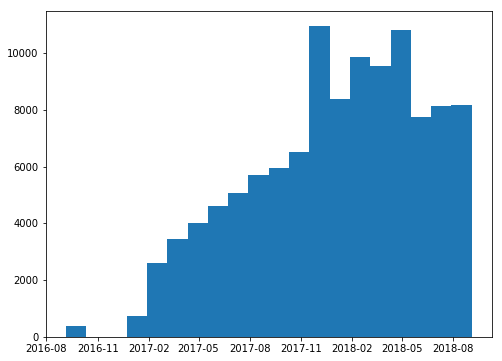

In [127]:
plt.figure(figsize=(8,6))
_ = plt.hist(timestamp, bins=20)

In [128]:
product_set = product_category.unique()
print(len(product_set))
print(product_set)

74
['cool_stuff' 'pet_shop' 'moveis_decoracao' 'perfumaria'
 'ferramentas_jardim' 'utilidades_domesticas' 'telefonia' 'beleza_saude'
 'livros_tecnicos' 'fashion_bolsas_e_acessorios' 'cama_mesa_banho'
 'esporte_lazer' 'consoles_games' 'moveis_escritorio' 'malas_acessorios'
 'alimentos' 'agro_industria_e_comercio' 'eletronicos'
 'informatica_acessorios' 'construcao_ferramentas_construcao' 'audio'
 'bebes' 'construcao_ferramentas_iluminacao' 'brinquedos' 'papelaria'
 'industria_comercio_e_negocios' 'relogios_presentes' 'automotivo' nan
 'eletrodomesticos' 'moveis_cozinha_area_de_servico_jantar_e_jardim'
 'climatizacao' 'casa_conforto' 'telefonia_fixa'
 'portateis_casa_forno_e_cafe' 'fraldas_higiene' 'sinalizacao_e_seguranca'
 'instrumentos_musicais' 'eletroportateis' 'construcao_ferramentas_jardim'
 'artes' 'casa_construcao' 'livros_interesse_geral' 'artigos_de_festas'
 'construcao_ferramentas_seguranca' 'cine_foto'
 'fashion_underwear_e_moda_praia' 'fashion_roupa_masculina'
 'alimentos_b

In [106]:
order_stream = {}
order_stream["all"] = timestamp
for prod in product_set:
    order_stream[prod] = timestamp[product_category == prod]
   

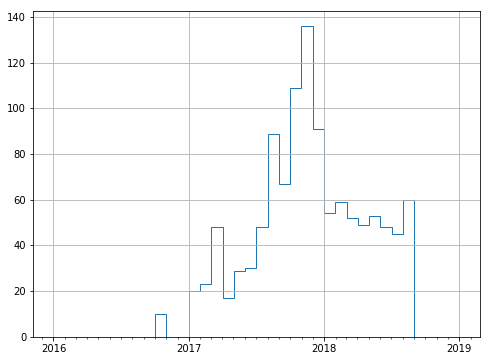

In [129]:
selected_product_category = "consoles_games"

months = mdates.MonthLocator() 
years = mdates.YearLocator()   # every year
yearsFmt = mdates.DateFormatter('%Y')

start = pd.Timestamp('2016-01-01')
end = pd.Timestamp('2019-01-01')
t = np.linspace(start.value, end.value, 37)
t = pd.to_datetime(t)
t = mdates.date2num(t)

x = order_stream[selected_product_category]
fig, ax = plt.subplots(figsize=(8,6))
ax.hist(x, bins=t, histtype="step")

# format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)

# round to nearest years...
ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.grid(True)
#_ = plt.hist(order_stream["cool_stuff"], bins=15, histtype="step", density=True)
#_ = plt.hist(order_stream["pet_shop"], bins=15, histtype="step", density=True)
#_ = plt.hist(order_stream["artes"], bins=15, histtype="step", density=True)
plt.show()